In [1]:
!pip install -U nilearn

Requirement already up-to-date: nilearn in ./.local/lib/python2.7/site-packages (0.4.2)


In [2]:
import warnings

import numpy as np
from scipy import stats
from sklearn.decomposition import FastICA

from sklearn.random_projection import GaussianRandomProjection
from nilearn import datasets
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting

from nilearn.datasets import fetch_neurovault, fetch_neurovault_ids
from nilearn.datasets.neurovault import basic_collection_terms, NotNull

import matplotlib.pyplot as plt


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
print("Fetching Neurovault images; "
      "if you haven't downloaded any Neurovault data before "
      "this will take several minutes.")
nv_data = fetch_neurovault_ids(collection_ids=['1952'])

Fetching Neurovault images; if you haven't downloaded any Neurovault data before this will take several minutes.
Reading local neurovault data.
No image found on local disk.
Reading server neurovault data.
getting new batch: http://neurovault.org/api/collections/1952
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=0
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32015.nii.gz
Already fetched 1 image
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32016.nii.gz
Already fetched 2 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32017.nii.gz
Already fetched 3 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32018.nii.gz
Already fetched 4 ima

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32048.nii.gz
Already fetched 34 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32049.nii.gz
Already fetched 35 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32050.nii.gz
Already fetched 36 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32051.nii.gz
Already fetched 37 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32052.nii.gz
Already fetched 38 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32053.nii.gz
Already fetched 39 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32054.nii.gz
Already fetched 40 images
Download succ

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32083.nii.gz
Already fetched 69 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32084.nii.gz
Already fetched 70 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32085.nii.gz
Already fetched 71 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32086.nii.gz
Already fetched 72 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32087.nii.gz
Already fetched 73 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32088.nii.gz
Already fetched 74 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32089.nii.gz
Already fetched 75 images
Download succ

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32117.nii.gz
Already fetched 103 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32118.nii.gz
Already fetched 104 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32119.nii.gz
Already fetched 105 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32120.nii.gz
Already fetched 106 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32121.nii.gz
Already fetched 107 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32122.nii.gz
Already fetched 108 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32123.nii.gz
Already fetched 109 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32152.nii.gz
Already fetched 138 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32153.nii.gz
Already fetched 139 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32154.nii.gz
Already fetched 140 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32155.nii.gz
Already fetched 141 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32156.nii.gz
Already fetched 142 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32157.nii.gz
Already fetched 143 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32158.nii.gz
Already fetched 144 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32187.nii.gz
Already fetched 173 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32188.nii.gz
Already fetched 174 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32189.nii.gz
Already fetched 175 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32190.nii.gz
Already fetched 176 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32191.nii.gz
Already fetched 177 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32192.nii.gz
Already fetched 178 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32193.nii.gz
Already fetched 179 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32221.nii.gz
Already fetched 207 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32222.nii.gz
Already fetched 208 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32223.nii.gz
Already fetched 209 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32224.nii.gz
Already fetched 210 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32225.nii.gz
Already fetched 211 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32226.nii.gz
Already fetched 212 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32227.nii.gz
Already fetched 213 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32256.nii.gz
Already fetched 242 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32257.nii.gz
Already fetched 243 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32258.nii.gz
Already fetched 244 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32259.nii.gz
Already fetched 245 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32260.nii.gz
Already fetched 246 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32261.nii.gz
Already fetched 247 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32262.nii.gz
Already fetched 248 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32291.nii.gz
Already fetched 277 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32292.nii.gz
Already fetched 278 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32293.nii.gz
Already fetched 279 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32294.nii.gz
Already fetched 280 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32295.nii.gz
Already fetched 281 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32296.nii.gz
Already fetched 282 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32297.nii.gz
Already fetched 283 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32325.nii.gz
Already fetched 311 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32326.nii.gz
Already fetched 312 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32327.nii.gz
Already fetched 313 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32328.nii.gz
Already fetched 314 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32329.nii.gz
Already fetched 315 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32330.nii.gz
Already fetched 316 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32331.nii.gz
Already fetched 317 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32360.nii.gz
Already fetched 346 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32361.nii.gz
Already fetched 347 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32362.nii.gz
Already fetched 348 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32363.nii.gz
Already fetched 349 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32364.nii.gz
Already fetched 350 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32365.nii.gz
Already fetched 351 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32366.nii.gz
Already fetched 352 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32395.nii.gz
Already fetched 381 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32396.nii.gz
Already fetched 382 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32397.nii.gz
Already fetched 383 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32398.nii.gz
Already fetched 384 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32399.nii.gz
Already fetched 385 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32400.nii.gz
Already fetched 386 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32401.nii.gz
Already fetched 387 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32429.nii.gz
Already fetched 415 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32430.nii.gz
Already fetched 416 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32431.nii.gz
Already fetched 417 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32432.nii.gz
Already fetched 418 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32433.nii.gz
Already fetched 419 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32434.nii.gz
Already fetched 420 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32435.nii.gz
Already fetched 421 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32464.nii.gz
Already fetched 450 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32465.nii.gz
Already fetched 451 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32466.nii.gz
Already fetched 452 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32467.nii.gz
Already fetched 453 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32468.nii.gz
Already fetched 454 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32469.nii.gz
Already fetched 455 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32470.nii.gz
Already fetched 456 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32499.nii.gz
Already fetched 485 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32500.nii.gz
Already fetched 486 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32501.nii.gz
Already fetched 487 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32502.nii.gz
Already fetched 488 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32503.nii.gz
Already fetched 489 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32504.nii.gz
Already fetched 490 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32505.nii.gz
Already fetched 491 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32533.nii.gz
Already fetched 519 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32534.nii.gz
Already fetched 520 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32535.nii.gz
Already fetched 521 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32536.nii.gz
Already fetched 522 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32537.nii.gz
Already fetched 523 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32538.nii.gz
Already fetched 524 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32539.nii.gz
Already fetched 525 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32568.nii.gz
Already fetched 554 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32569.nii.gz
Already fetched 555 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32570.nii.gz
Already fetched 556 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32571.nii.gz
Already fetched 557 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32572.nii.gz
Already fetched 558 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32573.nii.gz
Already fetched 559 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32574.nii.gz
Already fetched 560 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32603.nii.gz
Already fetched 589 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32604.nii.gz
Already fetched 590 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32605.nii.gz
Already fetched 591 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32606.nii.gz
Already fetched 592 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32607.nii.gz
Already fetched 593 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32608.nii.gz
Already fetched 594 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32609.nii.gz
Already fetched 595 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32637.nii.gz
Already fetched 623 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32638.nii.gz
Already fetched 624 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32639.nii.gz
Already fetched 625 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32640.nii.gz
Already fetched 626 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32641.nii.gz
Already fetched 627 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32642.nii.gz
Already fetched 628 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32643.nii.gz
Already fetched 629 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32671.nii.gz
Already fetched 657 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32672.nii.gz
Already fetched 658 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32673.nii.gz
Already fetched 659 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32674.nii.gz
Already fetched 660 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32675.nii.gz
Already fetched 661 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32676.nii.gz
Already fetched 662 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32677.nii.gz
Already fetched 663 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32706.nii.gz
Already fetched 692 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32707.nii.gz
Already fetched 693 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32708.nii.gz
Already fetched 694 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32709.nii.gz
Already fetched 695 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32710.nii.gz
Already fetched 696 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32711.nii.gz
Already fetched 697 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32712.nii.gz
Already fetched 698 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32740.nii.gz
Already fetched 726 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32741.nii.gz
Already fetched 727 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32742.nii.gz
Already fetched 728 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32743.nii.gz
Already fetched 729 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32744.nii.gz
Already fetched 730 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32745.nii.gz
Already fetched 731 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32746.nii.gz
Already fetched 732 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32775.nii.gz
Already fetched 761 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32776.nii.gz
Already fetched 762 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32777.nii.gz
Already fetched 763 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32778.nii.gz
Already fetched 764 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32779.nii.gz
Already fetched 765 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32780.nii.gz
Already fetched 766 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32781.nii.gz
Already fetched 767 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32810.nii.gz
Already fetched 796 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32811.nii.gz
Already fetched 797 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32812.nii.gz
Already fetched 798 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32813.nii.gz
Already fetched 799 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32814.nii.gz
Already fetched 800 images
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=800
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32815.nii

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32844.nii.gz
Already fetched 830 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32845.nii.gz
Already fetched 831 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32846.nii.gz
Already fetched 832 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32847.nii.gz
Already fetched 833 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32848.nii.gz
Already fetched 834 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32849.nii.gz
Already fetched 835 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32850.nii.gz
Already fetched 836 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32879.nii.gz
Already fetched 865 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32880.nii.gz
Already fetched 866 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32881.nii.gz
Already fetched 867 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32882.nii.gz
Already fetched 868 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32883.nii.gz
Already fetched 869 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32884.nii.gz
Already fetched 870 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32885.nii.gz
Already fetched 871 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32914.nii.gz
Already fetched 900 images
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=900
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32915.nii.gz
Already fetched 901 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32916.nii.gz
Already fetched 902 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32917.nii.gz
Already fetched 903 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32918.nii.gz
Already fetched 904 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32919.nii

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32948.nii.gz
Already fetched 934 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32949.nii.gz
Already fetched 935 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32950.nii.gz
Already fetched 936 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32951.nii.gz
Already fetched 937 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32952.nii.gz
Already fetched 938 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32953.nii.gz
Already fetched 939 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32954.nii.gz
Already fetched 940 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32981.nii.gz
Already fetched 967 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32982.nii.gz
Already fetched 968 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32983.nii.gz
Already fetched 969 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32984.nii.gz
Already fetched 970 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32985.nii.gz
Already fetched 971 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32986.nii.gz
Already fetched 972 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_32987.nii.gz
Already fetched 973 images
Downlo

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33014.nii.gz
Already fetched 1000 images
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=1000
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33015.nii.gz
Already fetched 1001 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33016.nii.gz
Already fetched 1002 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33017.nii.gz
Already fetched 1003 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33018.nii.gz
Already fetched 1004 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_330

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33047.nii.gz
Already fetched 1033 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33048.nii.gz
Already fetched 1034 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33049.nii.gz
Already fetched 1035 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33050.nii.gz
Already fetched 1036 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33051.nii.gz
Already fetched 1037 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33052.nii.gz
Already fetched 1038 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33053.nii.gz
Already fetched 1039 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33081.nii.gz
Already fetched 1067 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33082.nii.gz
Already fetched 1068 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33083.nii.gz
Already fetched 1069 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33084.nii.gz
Already fetched 1070 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33085.nii.gz
Already fetched 1071 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33086.nii.gz
Already fetched 1072 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33087.nii.gz
Already fetched 1073 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33115.nii.gz
Already fetched 1101 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33116.nii.gz
Already fetched 1102 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33117.nii.gz
Already fetched 1103 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33118.nii.gz
Already fetched 1104 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33119.nii.gz
Already fetched 1105 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33120.nii.gz
Already fetched 1106 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33121.nii.gz
Already fetched 1107 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33150.nii.gz
Already fetched 1136 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33151.nii.gz
Already fetched 1137 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33152.nii.gz
Already fetched 1138 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33153.nii.gz
Already fetched 1139 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33154.nii.gz
Already fetched 1140 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33155.nii.gz
Already fetched 1141 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33156.nii.gz
Already fetched 1142 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33184.nii.gz
Already fetched 1170 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33185.nii.gz
Already fetched 1171 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33186.nii.gz
Already fetched 1172 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33187.nii.gz
Already fetched 1173 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33188.nii.gz
Already fetched 1174 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33189.nii.gz
Already fetched 1175 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33190.nii.gz
Already fetched 1176 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33218.nii.gz
Already fetched 1204 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33219.nii.gz
Already fetched 1205 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33220.nii.gz
Already fetched 1206 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33221.nii.gz
Already fetched 1207 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33222.nii.gz
Already fetched 1208 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33223.nii.gz
Already fetched 1209 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33224.nii.gz
Already fetched 1210 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33252.nii.gz
Already fetched 1238 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33253.nii.gz
Already fetched 1239 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33254.nii.gz
Already fetched 1240 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33255.nii.gz
Already fetched 1241 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33256.nii.gz
Already fetched 1242 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33257.nii.gz
Already fetched 1243 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33258.nii.gz
Already fetched 1244 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33285.nii.gz
Already fetched 1271 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33286.nii.gz
Already fetched 1272 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33287.nii.gz
Already fetched 1273 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33288.nii.gz
Already fetched 1274 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33289.nii.gz
Already fetched 1275 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33290.nii.gz
Already fetched 1276 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33291.nii.gz
Already fetched 1277 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33319.nii.gz
Already fetched 1305 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33320.nii.gz
Already fetched 1306 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33321.nii.gz
Already fetched 1307 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33322.nii.gz
Already fetched 1308 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33323.nii.gz
Already fetched 1309 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33324.nii.gz
Already fetched 1310 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33325.nii.gz
Already fetched 1311 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33353.nii.gz
Already fetched 1339 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33354.nii.gz
Already fetched 1340 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33355.nii.gz
Already fetched 1341 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33356.nii.gz
Already fetched 1342 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33357.nii.gz
Already fetched 1343 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33358.nii.gz
Already fetched 1344 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33359.nii.gz
Already fetched 1345 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33388.nii.gz
Already fetched 1374 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33389.nii.gz
Already fetched 1375 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33390.nii.gz
Already fetched 1376 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33391.nii.gz
Already fetched 1377 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33392.nii.gz
Already fetched 1378 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33393.nii.gz
Already fetched 1379 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33394.nii.gz
Already fetched 1380 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33421.nii.gz
Already fetched 1407 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33422.nii.gz
Already fetched 1408 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33423.nii.gz
Already fetched 1409 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33424.nii.gz
Already fetched 1410 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33425.nii.gz
Already fetched 1411 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33426.nii.gz
Already fetched 1412 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33427.nii.gz
Already fetched 1413 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33455.nii.gz
Already fetched 1441 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33456.nii.gz
Already fetched 1442 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33457.nii.gz
Already fetched 1443 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33458.nii.gz
Already fetched 1444 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33459.nii.gz
Already fetched 1445 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33460.nii.gz
Already fetched 1446 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33461.nii.gz
Already fetched 1447 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33489.nii.gz
Already fetched 1475 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33490.nii.gz
Already fetched 1476 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33491.nii.gz
Already fetched 1477 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33492.nii.gz
Already fetched 1478 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33493.nii.gz
Already fetched 1479 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33494.nii.gz
Already fetched 1480 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33495.nii.gz
Already fetched 1481 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33523.nii.gz
Already fetched 1509 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33524.nii.gz
Already fetched 1510 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33525.nii.gz
Already fetched 1511 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33526.nii.gz
Already fetched 1512 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33527.nii.gz
Already fetched 1513 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33528.nii.gz
Already fetched 1514 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33529.nii.gz
Already fetched 1515 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33557.nii.gz
Already fetched 1543 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33558.nii.gz
Already fetched 1544 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33559.nii.gz
Already fetched 1545 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33560.nii.gz
Already fetched 1546 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33561.nii.gz
Already fetched 1547 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33562.nii.gz
Already fetched 1548 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33563.nii.gz
Already fetched 1549 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33591.nii.gz
Already fetched 1577 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33592.nii.gz
Already fetched 1578 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33593.nii.gz
Already fetched 1579 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33594.nii.gz
Already fetched 1580 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33595.nii.gz
Already fetched 1581 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33596.nii.gz
Already fetched 1582 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33597.nii.gz
Already fetched 1583 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33624.nii.gz
Already fetched 1610 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33625.nii.gz
Already fetched 1611 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33626.nii.gz
Already fetched 1612 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33627.nii.gz
Already fetched 1613 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33628.nii.gz
Already fetched 1614 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33629.nii.gz
Already fetched 1615 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33630.nii.gz
Already fetched 1616 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33658.nii.gz
Already fetched 1644 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33659.nii.gz
Already fetched 1645 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33660.nii.gz
Already fetched 1646 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33661.nii.gz
Already fetched 1647 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33662.nii.gz
Already fetched 1648 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33663.nii.gz
Already fetched 1649 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33664.nii.gz
Already fetched 1650 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33692.nii.gz
Already fetched 1678 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33693.nii.gz
Already fetched 1679 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33694.nii.gz
Already fetched 1680 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33695.nii.gz
Already fetched 1681 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33696.nii.gz
Already fetched 1682 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33697.nii.gz
Already fetched 1683 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33698.nii.gz
Already fetched 1684 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33725.nii.gz
Already fetched 1711 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33726.nii.gz
Already fetched 1712 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33727.nii.gz
Already fetched 1713 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33728.nii.gz
Already fetched 1714 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33729.nii.gz
Already fetched 1715 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33730.nii.gz
Already fetched 1716 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33731.nii.gz
Already fetched 1717 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33760.nii.gz
Already fetched 1746 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33761.nii.gz
Already fetched 1747 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33762.nii.gz
Already fetched 1748 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33763.nii.gz
Already fetched 1749 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33764.nii.gz
Already fetched 1750 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33765.nii.gz
Already fetched 1751 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_33766.nii.gz
Already fetched 1752 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34184.nii.gz
Already fetched 1781 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34185.nii.gz
Already fetched 1782 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34186.nii.gz
Already fetched 1783 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34187.nii.gz
Already fetched 1784 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34188.nii.gz
Already fetched 1785 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34189.nii.gz
Already fetched 1786 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34190.nii.gz
Already fetched 1787 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34218.nii.gz
Already fetched 1815 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34219.nii.gz
Already fetched 1816 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34220.nii.gz
Already fetched 1817 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34221.nii.gz
Already fetched 1818 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34222.nii.gz
Already fetched 1819 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34223.nii.gz
Already fetched 1820 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34224.nii.gz
Already fetched 1821 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34253.nii.gz
Already fetched 1850 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34254.nii.gz
Already fetched 1851 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34255.nii.gz
Already fetched 1852 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34256.nii.gz
Already fetched 1853 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34257.nii.gz
Already fetched 1854 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34258.nii.gz
Already fetched 1855 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34259.nii.gz
Already fetched 1856 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34288.nii.gz
Already fetched 1885 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34289.nii.gz
Already fetched 1886 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34290.nii.gz
Already fetched 1887 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34291.nii.gz
Already fetched 1888 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34292.nii.gz
Already fetched 1889 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34293.nii.gz
Already fetched 1890 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34294.nii.gz
Already fetched 1891 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34322.nii.gz
Already fetched 1919 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34323.nii.gz
Already fetched 1920 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34324.nii.gz
Already fetched 1921 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34325.nii.gz
Already fetched 1922 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34326.nii.gz
Already fetched 1923 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34327.nii.gz
Already fetched 1924 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34328.nii.gz
Already fetched 1925 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34357.nii.gz
Already fetched 1954 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34358.nii.gz
Already fetched 1955 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34359.nii.gz
Already fetched 1956 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34360.nii.gz
Already fetched 1957 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34361.nii.gz
Already fetched 1958 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34362.nii.gz
Already fetched 1959 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34363.nii.gz
Already fetched 1960 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34392.nii.gz
Already fetched 1989 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34393.nii.gz
Already fetched 1990 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34394.nii.gz
Already fetched 1991 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34395.nii.gz
Already fetched 1992 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34396.nii.gz
Already fetched 1993 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34397.nii.gz
Already fetched 1994 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34398.nii.gz
Already fetched 1995 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34425.nii.gz
Already fetched 2022 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34426.nii.gz
Already fetched 2023 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34427.nii.gz
Already fetched 2024 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34428.nii.gz
Already fetched 2025 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34429.nii.gz
Already fetched 2026 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34430.nii.gz
Already fetched 2027 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34431.nii.gz
Already fetched 2028 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34460.nii.gz
Already fetched 2057 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34461.nii.gz
Already fetched 2058 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34462.nii.gz
Already fetched 2059 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34463.nii.gz
Already fetched 2060 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34464.nii.gz
Already fetched 2061 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34465.nii.gz
Already fetched 2062 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34466.nii.gz
Already fetched 2063 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34493.nii.gz
Already fetched 2090 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34494.nii.gz
Already fetched 2091 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34495.nii.gz
Already fetched 2092 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34496.nii.gz
Already fetched 2093 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34497.nii.gz
Already fetched 2094 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34498.nii.gz
Already fetched 2095 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34499.nii.gz
Already fetched 2096 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34527.nii.gz
Already fetched 2124 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34528.nii.gz
Already fetched 2125 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34529.nii.gz
Already fetched 2126 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34530.nii.gz
Already fetched 2127 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34531.nii.gz
Already fetched 2128 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34532.nii.gz
Already fetched 2129 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34533.nii.gz
Already fetched 2130 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34561.nii.gz
Already fetched 2158 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34562.nii.gz
Already fetched 2159 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34563.nii.gz
Already fetched 2160 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34564.nii.gz
Already fetched 2161 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34565.nii.gz
Already fetched 2162 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34566.nii.gz
Already fetched 2163 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34567.nii.gz
Already fetched 2164 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34595.nii.gz
Already fetched 2192 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34596.nii.gz
Already fetched 2193 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34597.nii.gz
Already fetched 2194 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34598.nii.gz
Already fetched 2195 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34599.nii.gz
Already fetched 2196 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34600.nii.gz
Already fetched 2197 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34601.nii.gz
Already fetched 2198 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34628.nii.gz
Already fetched 2225 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34629.nii.gz
Already fetched 2226 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34630.nii.gz
Already fetched 2227 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34631.nii.gz
Already fetched 2228 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34632.nii.gz
Already fetched 2229 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34633.nii.gz
Already fetched 2230 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34634.nii.gz
Already fetched 2231 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34661.nii.gz
Already fetched 2258 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34662.nii.gz
Already fetched 2259 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34663.nii.gz
Already fetched 2260 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34664.nii.gz
Already fetched 2261 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34665.nii.gz
Already fetched 2262 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34666.nii.gz
Already fetched 2263 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34667.nii.gz
Already fetched 2264 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34694.nii.gz
Already fetched 2291 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34695.nii.gz
Already fetched 2292 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34696.nii.gz
Already fetched 2293 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34697.nii.gz
Already fetched 2294 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34698.nii.gz
Already fetched 2295 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34699.nii.gz
Already fetched 2296 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34700.nii.gz
Already fetched 2297 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34727.nii.gz
Already fetched 2324 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34728.nii.gz
Already fetched 2325 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34729.nii.gz
Already fetched 2326 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34730.nii.gz
Already fetched 2327 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34731.nii.gz
Already fetched 2328 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34732.nii.gz
Already fetched 2329 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34733.nii.gz
Already fetched 2330 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34762.nii.gz
Already fetched 2359 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34763.nii.gz
Already fetched 2360 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34764.nii.gz
Already fetched 2361 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34765.nii.gz
Already fetched 2362 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34766.nii.gz
Already fetched 2363 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34767.nii.gz
Already fetched 2364 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34768.nii.gz
Already fetched 2365 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34795.nii.gz
Already fetched 2392 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34796.nii.gz
Already fetched 2393 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34797.nii.gz
Already fetched 2394 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34798.nii.gz
Already fetched 2395 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34799.nii.gz
Already fetched 2396 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34800.nii.gz
Already fetched 2397 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34801.nii.gz
Already fetched 2398 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34827.nii.gz
Already fetched 2424 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34828.nii.gz
Already fetched 2425 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34829.nii.gz
Already fetched 2426 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34830.nii.gz
Already fetched 2427 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34831.nii.gz
Already fetched 2428 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34832.nii.gz
Already fetched 2429 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34833.nii.gz
Already fetched 2430 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34859.nii.gz
Already fetched 2456 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34860.nii.gz
Already fetched 2457 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34861.nii.gz
Already fetched 2458 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34862.nii.gz
Already fetched 2459 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34863.nii.gz
Already fetched 2460 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34864.nii.gz
Already fetched 2461 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34865.nii.gz
Already fetched 2462 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34891.nii.gz
Already fetched 2488 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34892.nii.gz
Already fetched 2489 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34893.nii.gz
Already fetched 2490 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34894.nii.gz
Already fetched 2491 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34895.nii.gz
Already fetched 2492 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34896.nii.gz
Already fetched 2493 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34897.nii.gz
Already fetched 2494 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34922.nii.gz
Already fetched 2519 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34923.nii.gz
Already fetched 2520 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34924.nii.gz
Already fetched 2521 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34925.nii.gz
Already fetched 2522 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34926.nii.gz
Already fetched 2523 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34927.nii.gz
Already fetched 2524 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34928.nii.gz
Already fetched 2525 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34954.nii.gz
Already fetched 2551 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34955.nii.gz
Already fetched 2552 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34956.nii.gz
Already fetched 2553 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34957.nii.gz
Already fetched 2554 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34958.nii.gz
Already fetched 2555 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34959.nii.gz
Already fetched 2556 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34960.nii.gz
Already fetched 2557 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34986.nii.gz
Already fetched 2583 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34987.nii.gz
Already fetched 2584 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34988.nii.gz
Already fetched 2585 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34989.nii.gz
Already fetched 2586 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34990.nii.gz
Already fetched 2587 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34991.nii.gz
Already fetched 2588 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_34992.nii.gz
Already fetched 2589 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35018.nii.gz
Already fetched 2615 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35019.nii.gz
Already fetched 2616 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35020.nii.gz
Already fetched 2617 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35021.nii.gz
Already fetched 2618 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35022.nii.gz
Already fetched 2619 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35023.nii.gz
Already fetched 2620 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35024.nii.gz
Already fetched 2621 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35051.nii.gz
Already fetched 2648 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35052.nii.gz
Already fetched 2649 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35053.nii.gz
Already fetched 2650 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35054.nii.gz
Already fetched 2651 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35055.nii.gz
Already fetched 2652 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35056.nii.gz
Already fetched 2653 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35057.nii.gz
Already fetched 2654 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35084.nii.gz
Already fetched 2681 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35085.nii.gz
Already fetched 2682 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35086.nii.gz
Already fetched 2683 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35087.nii.gz
Already fetched 2684 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35088.nii.gz
Already fetched 2685 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35089.nii.gz
Already fetched 2686 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35090.nii.gz
Already fetched 2687 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35118.nii.gz
Already fetched 2715 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35119.nii.gz
Already fetched 2716 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35120.nii.gz
Already fetched 2717 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35121.nii.gz
Already fetched 2718 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35122.nii.gz
Already fetched 2719 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35123.nii.gz
Already fetched 2720 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35124.nii.gz
Already fetched 2721 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35153.nii.gz
Already fetched 2750 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35154.nii.gz
Already fetched 2751 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35155.nii.gz
Already fetched 2752 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35156.nii.gz
Already fetched 2753 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35157.nii.gz
Already fetched 2754 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35158.nii.gz
Already fetched 2755 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35159.nii.gz
Already fetched 2756 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35187.nii.gz
Already fetched 2784 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35188.nii.gz
Already fetched 2785 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35189.nii.gz
Already fetched 2786 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35190.nii.gz
Already fetched 2787 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35191.nii.gz
Already fetched 2788 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35192.nii.gz
Already fetched 2789 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35193.nii.gz
Already fetched 2790 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35221.nii.gz
Already fetched 2818 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35222.nii.gz
Already fetched 2819 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35223.nii.gz
Already fetched 2820 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35224.nii.gz
Already fetched 2821 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35225.nii.gz
Already fetched 2822 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35226.nii.gz
Already fetched 2823 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35227.nii.gz
Already fetched 2824 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35256.nii.gz
Already fetched 2853 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35257.nii.gz
Already fetched 2854 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35258.nii.gz
Already fetched 2855 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35259.nii.gz
Already fetched 2856 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35260.nii.gz
Already fetched 2857 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35261.nii.gz
Already fetched 2858 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35262.nii.gz
Already fetched 2859 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35291.nii.gz
Already fetched 2888 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35292.nii.gz
Already fetched 2889 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35293.nii.gz
Already fetched 2890 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35294.nii.gz
Already fetched 2891 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35295.nii.gz
Already fetched 2892 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35296.nii.gz
Already fetched 2893 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35297.nii.gz
Already fetched 2894 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35325.nii.gz
Already fetched 2922 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35326.nii.gz
Already fetched 2923 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35327.nii.gz
Already fetched 2924 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35328.nii.gz
Already fetched 2925 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35329.nii.gz
Already fetched 2926 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35330.nii.gz
Already fetched 2927 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35331.nii.gz
Already fetched 2928 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35358.nii.gz
Already fetched 2955 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35359.nii.gz
Already fetched 2956 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35360.nii.gz
Already fetched 2957 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35361.nii.gz
Already fetched 2958 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35362.nii.gz
Already fetched 2959 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35363.nii.gz
Already fetched 2960 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35364.nii.gz
Already fetched 2961 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35391.nii.gz
Already fetched 2988 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35392.nii.gz
Already fetched 2989 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35393.nii.gz
Already fetched 2990 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35394.nii.gz
Already fetched 2991 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35395.nii.gz
Already fetched 2992 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35396.nii.gz
Already fetched 2993 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35397.nii.gz
Already fetched 2994 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35423.nii.gz
Already fetched 3020 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35424.nii.gz
Already fetched 3021 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35425.nii.gz
Already fetched 3022 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35426.nii.gz
Already fetched 3023 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35427.nii.gz
Already fetched 3024 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35428.nii.gz
Already fetched 3025 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35429.nii.gz
Already fetched 3026 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35456.nii.gz
Already fetched 3053 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35457.nii.gz
Already fetched 3054 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35458.nii.gz
Already fetched 3055 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35459.nii.gz
Already fetched 3056 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35460.nii.gz
Already fetched 3057 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35461.nii.gz
Already fetched 3058 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35462.nii.gz
Already fetched 3059 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35489.nii.gz
Already fetched 3086 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35490.nii.gz
Already fetched 3087 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35491.nii.gz
Already fetched 3088 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35492.nii.gz
Already fetched 3089 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35493.nii.gz
Already fetched 3090 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35494.nii.gz
Already fetched 3091 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35495.nii.gz
Already fetched 3092 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35522.nii.gz
Already fetched 3119 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35523.nii.gz
Already fetched 3120 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35524.nii.gz
Already fetched 3121 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35525.nii.gz
Already fetched 3122 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35526.nii.gz
Already fetched 3123 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35527.nii.gz
Already fetched 3124 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35528.nii.gz
Already fetched 3125 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35555.nii.gz
Already fetched 3152 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35556.nii.gz
Already fetched 3153 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35557.nii.gz
Already fetched 3154 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35558.nii.gz
Already fetched 3155 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35559.nii.gz
Already fetched 3156 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35560.nii.gz
Already fetched 3157 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35561.nii.gz
Already fetched 3158 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35588.nii.gz
Already fetched 3185 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35589.nii.gz
Already fetched 3186 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35590.nii.gz
Already fetched 3187 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35591.nii.gz
Already fetched 3188 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35592.nii.gz
Already fetched 3189 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35593.nii.gz
Already fetched 3190 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35594.nii.gz
Already fetched 3191 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35621.nii.gz
Already fetched 3218 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35622.nii.gz
Already fetched 3219 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35623.nii.gz
Already fetched 3220 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35624.nii.gz
Already fetched 3221 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35625.nii.gz
Already fetched 3222 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35626.nii.gz
Already fetched 3223 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35627.nii.gz
Already fetched 3224 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35654.nii.gz
Already fetched 3251 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35655.nii.gz
Already fetched 3252 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35656.nii.gz
Already fetched 3253 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35657.nii.gz
Already fetched 3254 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35658.nii.gz
Already fetched 3255 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35659.nii.gz
Already fetched 3256 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35660.nii.gz
Already fetched 3257 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35687.nii.gz
Already fetched 3284 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35688.nii.gz
Already fetched 3285 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35689.nii.gz
Already fetched 3286 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35690.nii.gz
Already fetched 3287 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35691.nii.gz
Already fetched 3288 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35692.nii.gz
Already fetched 3289 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35693.nii.gz
Already fetched 3290 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35719.nii.gz
Already fetched 3316 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35720.nii.gz
Already fetched 3317 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35721.nii.gz
Already fetched 3318 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35722.nii.gz
Already fetched 3319 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35723.nii.gz
Already fetched 3320 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35724.nii.gz
Already fetched 3321 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35725.nii.gz
Already fetched 3322 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35752.nii.gz
Already fetched 3349 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35753.nii.gz
Already fetched 3350 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35754.nii.gz
Already fetched 3351 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35755.nii.gz
Already fetched 3352 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35756.nii.gz
Already fetched 3353 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35757.nii.gz
Already fetched 3354 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35758.nii.gz
Already fetched 3355 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35784.nii.gz
Already fetched 3381 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35785.nii.gz
Already fetched 3382 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35786.nii.gz
Already fetched 3383 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35787.nii.gz
Already fetched 3384 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35788.nii.gz
Already fetched 3385 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35789.nii.gz
Already fetched 3386 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35790.nii.gz
Already fetched 3387 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35817.nii.gz
Already fetched 3414 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35818.nii.gz
Already fetched 3415 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35819.nii.gz
Already fetched 3416 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35820.nii.gz
Already fetched 3417 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35821.nii.gz
Already fetched 3418 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35822.nii.gz
Already fetched 3419 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35823.nii.gz
Already fetched 3420 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35851.nii.gz
Already fetched 3448 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35852.nii.gz
Already fetched 3449 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35853.nii.gz
Already fetched 3450 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35854.nii.gz
Already fetched 3451 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35855.nii.gz
Already fetched 3452 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35856.nii.gz
Already fetched 3453 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35857.nii.gz
Already fetched 3454 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35886.nii.gz
Already fetched 3483 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35887.nii.gz
Already fetched 3484 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35888.nii.gz
Already fetched 3485 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35889.nii.gz
Already fetched 3486 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35890.nii.gz
Already fetched 3487 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35891.nii.gz
Already fetched 3488 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35892.nii.gz
Already fetched 3489 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35920.nii.gz
Already fetched 3517 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35921.nii.gz
Already fetched 3518 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35922.nii.gz
Already fetched 3519 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35923.nii.gz
Already fetched 3520 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35924.nii.gz
Already fetched 3521 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35925.nii.gz
Already fetched 3522 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35926.nii.gz
Already fetched 3523 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35954.nii.gz
Already fetched 3551 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35955.nii.gz
Already fetched 3552 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35956.nii.gz
Already fetched 3553 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35957.nii.gz
Already fetched 3554 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35958.nii.gz
Already fetched 3555 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35959.nii.gz
Already fetched 3556 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35960.nii.gz
Already fetched 3557 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35988.nii.gz
Already fetched 3585 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35989.nii.gz
Already fetched 3586 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35990.nii.gz
Already fetched 3587 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35991.nii.gz
Already fetched 3588 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35992.nii.gz
Already fetched 3589 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35993.nii.gz
Already fetched 3590 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_35994.nii.gz
Already fetched 3591 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36021.nii.gz
Already fetched 3618 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36022.nii.gz
Already fetched 3619 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36023.nii.gz
Already fetched 3620 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36024.nii.gz
Already fetched 3621 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36025.nii.gz
Already fetched 3622 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36026.nii.gz
Already fetched 3623 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36027.nii.gz
Already fetched 3624 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36055.nii.gz
Already fetched 3652 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36056.nii.gz
Already fetched 3653 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36057.nii.gz
Already fetched 3654 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36058.nii.gz
Already fetched 3655 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36059.nii.gz
Already fetched 3656 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36060.nii.gz
Already fetched 3657 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36061.nii.gz
Already fetched 3658 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36089.nii.gz
Already fetched 3686 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36090.nii.gz
Already fetched 3687 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36091.nii.gz
Already fetched 3688 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36092.nii.gz
Already fetched 3689 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36093.nii.gz
Already fetched 3690 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36094.nii.gz
Already fetched 3691 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36095.nii.gz
Already fetched 3692 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36122.nii.gz
Already fetched 3719 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36123.nii.gz
Already fetched 3720 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36124.nii.gz
Already fetched 3721 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36125.nii.gz
Already fetched 3722 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36126.nii.gz
Already fetched 3723 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36127.nii.gz
Already fetched 3724 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36128.nii.gz
Already fetched 3725 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36155.nii.gz
Already fetched 3752 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36156.nii.gz
Already fetched 3753 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36157.nii.gz
Already fetched 3754 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36158.nii.gz
Already fetched 3755 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36159.nii.gz
Already fetched 3756 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36160.nii.gz
Already fetched 3757 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36161.nii.gz
Already fetched 3758 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36188.nii.gz
Already fetched 3785 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36189.nii.gz
Already fetched 3786 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36190.nii.gz
Already fetched 3787 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36191.nii.gz
Already fetched 3788 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36192.nii.gz
Already fetched 3789 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36193.nii.gz
Already fetched 3790 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36194.nii.gz
Already fetched 3791 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36220.nii.gz
Already fetched 3817 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36221.nii.gz
Already fetched 3818 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36222.nii.gz
Already fetched 3819 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36223.nii.gz
Already fetched 3820 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36224.nii.gz
Already fetched 3821 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36225.nii.gz
Already fetched 3822 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36226.nii.gz
Already fetched 3823 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36253.nii.gz
Already fetched 3850 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36254.nii.gz
Already fetched 3851 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36255.nii.gz
Already fetched 3852 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36256.nii.gz
Already fetched 3853 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36257.nii.gz
Already fetched 3854 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36258.nii.gz
Already fetched 3855 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36259.nii.gz
Already fetched 3856 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36286.nii.gz
Already fetched 3883 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36287.nii.gz
Already fetched 3884 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36288.nii.gz
Already fetched 3885 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36289.nii.gz
Already fetched 3886 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36290.nii.gz
Already fetched 3887 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36291.nii.gz
Already fetched 3888 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36292.nii.gz
Already fetched 3889 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36318.nii.gz
Already fetched 3915 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36319.nii.gz
Already fetched 3916 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36320.nii.gz
Already fetched 3917 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36321.nii.gz
Already fetched 3918 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36322.nii.gz
Already fetched 3919 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36323.nii.gz
Already fetched 3920 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36324.nii.gz
Already fetched 3921 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36351.nii.gz
Already fetched 3948 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36352.nii.gz
Already fetched 3949 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36353.nii.gz
Already fetched 3950 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36354.nii.gz
Already fetched 3951 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36355.nii.gz
Already fetched 3952 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36356.nii.gz
Already fetched 3953 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36357.nii.gz
Already fetched 3954 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36384.nii.gz
Already fetched 3981 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36385.nii.gz
Already fetched 3982 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36386.nii.gz
Already fetched 3983 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36387.nii.gz
Already fetched 3984 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36388.nii.gz
Already fetched 3985 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36389.nii.gz
Already fetched 3986 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36390.nii.gz
Already fetched 3987 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36416.nii.gz
Already fetched 4013 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36417.nii.gz
Already fetched 4014 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36418.nii.gz
Already fetched 4015 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36419.nii.gz
Already fetched 4016 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36420.nii.gz
Already fetched 4017 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36421.nii.gz
Already fetched 4018 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36422.nii.gz
Already fetched 4019 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36449.nii.gz
Already fetched 4046 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36450.nii.gz
Already fetched 4047 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36451.nii.gz
Already fetched 4048 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36452.nii.gz
Already fetched 4049 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36453.nii.gz
Already fetched 4050 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36454.nii.gz
Already fetched 4051 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36455.nii.gz
Already fetched 4052 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36482.nii.gz
Already fetched 4079 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36483.nii.gz
Already fetched 4080 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36484.nii.gz
Already fetched 4081 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36485.nii.gz
Already fetched 4082 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36486.nii.gz
Already fetched 4083 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36487.nii.gz
Already fetched 4084 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36488.nii.gz
Already fetched 4085 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36514.nii.gz
Already fetched 4111 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36515.nii.gz
Already fetched 4112 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36516.nii.gz
Already fetched 4113 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36517.nii.gz
Already fetched 4114 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36518.nii.gz
Already fetched 4115 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36519.nii.gz
Already fetched 4116 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36520.nii.gz
Already fetched 4117 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36547.nii.gz
Already fetched 4144 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36548.nii.gz
Already fetched 4145 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36549.nii.gz
Already fetched 4146 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36550.nii.gz
Already fetched 4147 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36551.nii.gz
Already fetched 4148 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36552.nii.gz
Already fetched 4149 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36553.nii.gz
Already fetched 4150 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36580.nii.gz
Already fetched 4177 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36581.nii.gz
Already fetched 4178 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36582.nii.gz
Already fetched 4179 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36583.nii.gz
Already fetched 4180 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36584.nii.gz
Already fetched 4181 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36585.nii.gz
Already fetched 4182 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36586.nii.gz
Already fetched 4183 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36612.nii.gz
Already fetched 4209 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36613.nii.gz
Already fetched 4210 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36614.nii.gz
Already fetched 4211 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36615.nii.gz
Already fetched 4212 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36616.nii.gz
Already fetched 4213 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36617.nii.gz
Already fetched 4214 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36618.nii.gz
Already fetched 4215 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36645.nii.gz
Already fetched 4242 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36646.nii.gz
Already fetched 4243 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36647.nii.gz
Already fetched 4244 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36648.nii.gz
Already fetched 4245 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36649.nii.gz
Already fetched 4246 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36650.nii.gz
Already fetched 4247 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36651.nii.gz
Already fetched 4248 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36678.nii.gz
Already fetched 4275 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36679.nii.gz
Already fetched 4276 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36680.nii.gz
Already fetched 4277 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36681.nii.gz
Already fetched 4278 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36682.nii.gz
Already fetched 4279 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36683.nii.gz
Already fetched 4280 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36684.nii.gz
Already fetched 4281 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36710.nii.gz
Already fetched 4307 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36711.nii.gz
Already fetched 4308 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36712.nii.gz
Already fetched 4309 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36713.nii.gz
Already fetched 4310 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36714.nii.gz
Already fetched 4311 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36715.nii.gz
Already fetched 4312 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36716.nii.gz
Already fetched 4313 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36743.nii.gz
Already fetched 4340 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36744.nii.gz
Already fetched 4341 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36745.nii.gz
Already fetched 4342 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36746.nii.gz
Already fetched 4343 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36747.nii.gz
Already fetched 4344 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36748.nii.gz
Already fetched 4345 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36749.nii.gz
Already fetched 4346 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36776.nii.gz
Already fetched 4373 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36777.nii.gz
Already fetched 4374 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36778.nii.gz
Already fetched 4375 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36779.nii.gz
Already fetched 4376 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36780.nii.gz
Already fetched 4377 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36781.nii.gz
Already fetched 4378 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36782.nii.gz
Already fetched 4379 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36809.nii.gz
Already fetched 4406 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36810.nii.gz
Already fetched 4407 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36811.nii.gz
Already fetched 4408 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36812.nii.gz
Already fetched 4409 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36813.nii.gz
Already fetched 4410 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36814.nii.gz
Already fetched 4411 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36815.nii.gz
Already fetched 4412 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36842.nii.gz
Already fetched 4439 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36843.nii.gz
Already fetched 4440 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36844.nii.gz
Already fetched 4441 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36845.nii.gz
Already fetched 4442 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36846.nii.gz
Already fetched 4443 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36847.nii.gz
Already fetched 4444 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36848.nii.gz
Already fetched 4445 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36875.nii.gz
Already fetched 4472 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36876.nii.gz
Already fetched 4473 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36877.nii.gz
Already fetched 4474 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36878.nii.gz
Already fetched 4475 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36879.nii.gz
Already fetched 4476 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36880.nii.gz
Already fetched 4477 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36881.nii.gz
Already fetched 4478 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36907.nii.gz
Already fetched 4504 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36908.nii.gz
Already fetched 4505 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36909.nii.gz
Already fetched 4506 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36910.nii.gz
Already fetched 4507 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36911.nii.gz
Already fetched 4508 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36912.nii.gz
Already fetched 4509 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36913.nii.gz
Already fetched 4510 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36940.nii.gz
Already fetched 4537 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36941.nii.gz
Already fetched 4538 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36942.nii.gz
Already fetched 4539 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36943.nii.gz
Already fetched 4540 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36944.nii.gz
Already fetched 4541 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36945.nii.gz
Already fetched 4542 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36946.nii.gz
Already fetched 4543 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36973.nii.gz
Already fetched 4570 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36974.nii.gz
Already fetched 4571 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36975.nii.gz
Already fetched 4572 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36976.nii.gz
Already fetched 4573 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36977.nii.gz
Already fetched 4574 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36978.nii.gz
Already fetched 4575 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_36979.nii.gz
Already fetched 4576 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37005.nii.gz
Already fetched 4602 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37006.nii.gz
Already fetched 4603 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37007.nii.gz
Already fetched 4604 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37008.nii.gz
Already fetched 4605 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37009.nii.gz
Already fetched 4606 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37010.nii.gz
Already fetched 4607 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37011.nii.gz
Already fetched 4608 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37038.nii.gz
Already fetched 4635 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37039.nii.gz
Already fetched 4636 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37040.nii.gz
Already fetched 4637 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37041.nii.gz
Already fetched 4638 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37042.nii.gz
Already fetched 4639 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37043.nii.gz
Already fetched 4640 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37044.nii.gz
Already fetched 4641 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37070.nii.gz
Already fetched 4667 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37071.nii.gz
Already fetched 4668 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37072.nii.gz
Already fetched 4669 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37073.nii.gz
Already fetched 4670 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37074.nii.gz
Already fetched 4671 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37075.nii.gz
Already fetched 4672 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37076.nii.gz
Already fetched 4673 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37103.nii.gz
Already fetched 4700 images
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=4700
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37104.nii.gz
Already fetched 4701 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37105.nii.gz
Already fetched 4702 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37106.nii.gz
Already fetched 4703 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37107.nii.gz
Already fetched 4704 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_371

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37135.nii.gz
Already fetched 4732 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37136.nii.gz
Already fetched 4733 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37137.nii.gz
Already fetched 4734 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37138.nii.gz
Already fetched 4735 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37139.nii.gz
Already fetched 4736 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37140.nii.gz
Already fetched 4737 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37141.nii.gz
Already fetched 4738 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37168.nii.gz
Already fetched 4765 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37169.nii.gz
Already fetched 4766 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37170.nii.gz
Already fetched 4767 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37171.nii.gz
Already fetched 4768 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37172.nii.gz
Already fetched 4769 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37173.nii.gz
Already fetched 4770 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37174.nii.gz
Already fetched 4771 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37201.nii.gz
Already fetched 4798 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37202.nii.gz
Already fetched 4799 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37203.nii.gz
Already fetched 4800 images
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=4800
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37204.nii.gz
Already fetched 4801 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37205.nii.gz
Already fetched 4802 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_372

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37233.nii.gz
Already fetched 4830 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37234.nii.gz
Already fetched 4831 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37235.nii.gz
Already fetched 4832 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37236.nii.gz
Already fetched 4833 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37237.nii.gz
Already fetched 4834 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37238.nii.gz
Already fetched 4835 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37239.nii.gz
Already fetched 4836 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37266.nii.gz
Already fetched 4863 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37267.nii.gz
Already fetched 4864 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37268.nii.gz
Already fetched 4865 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37269.nii.gz
Already fetched 4866 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37270.nii.gz
Already fetched 4867 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37271.nii.gz
Already fetched 4868 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37272.nii.gz
Already fetched 4869 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37299.nii.gz
Already fetched 4896 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37300.nii.gz
Already fetched 4897 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37301.nii.gz
Already fetched 4898 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37302.nii.gz
Already fetched 4899 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37303.nii.gz
Already fetched 4900 images
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=4900
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_373

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37332.nii.gz
Already fetched 4929 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37333.nii.gz
Already fetched 4930 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37334.nii.gz
Already fetched 4931 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37335.nii.gz
Already fetched 4932 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37336.nii.gz
Already fetched 4933 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37337.nii.gz
Already fetched 4934 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37338.nii.gz
Already fetched 4935 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37367.nii.gz
Already fetched 4964 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37368.nii.gz
Already fetched 4965 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37369.nii.gz
Already fetched 4966 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37370.nii.gz
Already fetched 4967 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37371.nii.gz
Already fetched 4968 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37372.nii.gz
Already fetched 4969 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37373.nii.gz
Already fetched 4970 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37402.nii.gz
Already fetched 4999 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37403.nii.gz
Already fetched 5000 images
Scroll images from collection 1952: getting new batch: http://neurovault.org/api/collections/1952/images/?limit=100&offset=5000
Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37404.nii.gz
Already fetched 5001 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37405.nii.gz
Already fetched 5002 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37406.nii.gz
Already fetched 5003 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_374

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37435.nii.gz
Already fetched 5032 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37436.nii.gz
Already fetched 5033 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37437.nii.gz
Already fetched 5034 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37438.nii.gz
Already fetched 5035 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37439.nii.gz
Already fetched 5036 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37440.nii.gz
Already fetched 5037 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37441.nii.gz
Already fetched 5038 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37469.nii.gz
Already fetched 5066 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37470.nii.gz
Already fetched 5067 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37471.nii.gz
Already fetched 5068 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37472.nii.gz
Already fetched 5069 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37473.nii.gz
Already fetched 5070 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37474.nii.gz
Already fetched 5071 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37475.nii.gz
Already fetched 5072 images

Scroll images from collection 1952: batch size: 100
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37504.nii.gz
Already fetched 5101 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37505.nii.gz
Already fetched 5102 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37506.nii.gz
Already fetched 5103 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37507.nii.gz
Already fetched 5104 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37508.nii.gz
Already fetched 5105 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37509.nii.gz
Already fetched 5106 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37538.nii.gz
Already fetched 5135 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37539.nii.gz
Already fetched 5136 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37540.nii.gz
Already fetched 5137 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37541.nii.gz
Already fetched 5138 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37542.nii.gz
Already fetched 5139 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37543.nii.gz
Already fetched 5140 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37544.nii.gz
Already fetched 5141 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37573.nii.gz
Already fetched 5170 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37574.nii.gz
Already fetched 5171 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37575.nii.gz
Already fetched 5172 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37576.nii.gz
Already fetched 5173 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37577.nii.gz
Already fetched 5174 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37578.nii.gz
Already fetched 5175 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37579.nii.gz
Already fetched 5176 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37607.nii.gz
Already fetched 5204 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37608.nii.gz
Already fetched 5205 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37609.nii.gz
Already fetched 5206 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37610.nii.gz
Already fetched 5207 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37611.nii.gz
Already fetched 5208 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37612.nii.gz
Already fetched 5209 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37613.nii.gz
Already fetched 5210 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37642.nii.gz
Already fetched 5239 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37643.nii.gz
Already fetched 5240 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37644.nii.gz
Already fetched 5241 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37645.nii.gz
Already fetched 5242 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37646.nii.gz
Already fetched 5243 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37647.nii.gz
Already fetched 5244 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37648.nii.gz
Already fetched 5245 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37677.nii.gz
Already fetched 5274 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37678.nii.gz
Already fetched 5275 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37679.nii.gz
Already fetched 5276 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37680.nii.gz
Already fetched 5277 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37681.nii.gz
Already fetched 5278 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37682.nii.gz
Already fetched 5279 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37683.nii.gz
Already fetched 5280 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37711.nii.gz
Already fetched 5308 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37712.nii.gz
Already fetched 5309 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37713.nii.gz
Already fetched 5310 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37714.nii.gz
Already fetched 5311 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37715.nii.gz
Already fetched 5312 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37716.nii.gz
Already fetched 5313 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37717.nii.gz
Already fetched 5314 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37746.nii.gz
Already fetched 5343 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37747.nii.gz
Already fetched 5344 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37748.nii.gz
Already fetched 5345 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37749.nii.gz
Already fetched 5346 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37750.nii.gz
Already fetched 5347 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37751.nii.gz
Already fetched 5348 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37752.nii.gz
Already fetched 5349 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37781.nii.gz
Already fetched 5378 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37782.nii.gz
Already fetched 5379 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37783.nii.gz
Already fetched 5380 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37784.nii.gz
Already fetched 5381 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37785.nii.gz
Already fetched 5382 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37786.nii.gz
Already fetched 5383 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37787.nii.gz
Already fetched 5384 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37815.nii.gz
Already fetched 5412 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37816.nii.gz
Already fetched 5413 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37817.nii.gz
Already fetched 5414 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37818.nii.gz
Already fetched 5415 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37819.nii.gz
Already fetched 5416 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37820.nii.gz
Already fetched 5417 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37821.nii.gz
Already fetched 5418 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37850.nii.gz
Already fetched 5447 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37851.nii.gz
Already fetched 5448 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37852.nii.gz
Already fetched 5449 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37853.nii.gz
Already fetched 5450 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37854.nii.gz
Already fetched 5451 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37855.nii.gz
Already fetched 5452 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37856.nii.gz
Already fetched 5453 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37884.nii.gz
Already fetched 5481 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37885.nii.gz
Already fetched 5482 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37886.nii.gz
Already fetched 5483 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37887.nii.gz
Already fetched 5484 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37888.nii.gz
Already fetched 5485 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37889.nii.gz
Already fetched 5486 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37890.nii.gz
Already fetched 5487 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37918.nii.gz
Already fetched 5515 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37919.nii.gz
Already fetched 5516 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37920.nii.gz
Already fetched 5517 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37921.nii.gz
Already fetched 5518 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37922.nii.gz
Already fetched 5519 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37923.nii.gz
Already fetched 5520 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37924.nii.gz
Already fetched 5521 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37953.nii.gz
Already fetched 5550 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37954.nii.gz
Already fetched 5551 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37955.nii.gz
Already fetched 5552 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37956.nii.gz
Already fetched 5553 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37957.nii.gz
Already fetched 5554 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37958.nii.gz
Already fetched 5555 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37959.nii.gz
Already fetched 5556 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37988.nii.gz
Already fetched 5585 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37989.nii.gz
Already fetched 5586 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37990.nii.gz
Already fetched 5587 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37991.nii.gz
Already fetched 5588 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37992.nii.gz
Already fetched 5589 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37993.nii.gz
Already fetched 5590 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_37994.nii.gz
Already fetched 5591 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38022.nii.gz
Already fetched 5619 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38023.nii.gz
Already fetched 5620 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38024.nii.gz
Already fetched 5621 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38025.nii.gz
Already fetched 5622 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38026.nii.gz
Already fetched 5623 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38027.nii.gz
Already fetched 5624 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38028.nii.gz
Already fetched 5625 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38057.nii.gz
Already fetched 5654 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38058.nii.gz
Already fetched 5655 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38059.nii.gz
Already fetched 5656 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38060.nii.gz
Already fetched 5657 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38061.nii.gz
Already fetched 5658 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38062.nii.gz
Already fetched 5659 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38063.nii.gz
Already fetched 5660 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38092.nii.gz
Already fetched 5689 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38093.nii.gz
Already fetched 5690 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38094.nii.gz
Already fetched 5691 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38095.nii.gz
Already fetched 5692 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38096.nii.gz
Already fetched 5693 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38097.nii.gz
Already fetched 5694 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38098.nii.gz
Already fetched 5695 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38125.nii.gz
Already fetched 5722 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38126.nii.gz
Already fetched 5723 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38127.nii.gz
Already fetched 5724 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38128.nii.gz
Already fetched 5725 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38129.nii.gz
Already fetched 5726 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38130.nii.gz
Already fetched 5727 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38131.nii.gz
Already fetched 5728 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38158.nii.gz
Already fetched 5755 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38159.nii.gz
Already fetched 5756 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38160.nii.gz
Already fetched 5757 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38161.nii.gz
Already fetched 5758 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38162.nii.gz
Already fetched 5759 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38163.nii.gz
Already fetched 5760 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38164.nii.gz
Already fetched 5761 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38191.nii.gz
Already fetched 5788 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38192.nii.gz
Already fetched 5789 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38193.nii.gz
Already fetched 5790 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38194.nii.gz
Already fetched 5791 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38195.nii.gz
Already fetched 5792 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38196.nii.gz
Already fetched 5793 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38197.nii.gz
Already fetched 5794 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38223.nii.gz
Already fetched 5820 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38224.nii.gz
Already fetched 5821 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38225.nii.gz
Already fetched 5822 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38226.nii.gz
Already fetched 5823 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38227.nii.gz
Already fetched 5824 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38228.nii.gz
Already fetched 5825 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38229.nii.gz
Already fetched 5826 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38256.nii.gz
Already fetched 5853 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38257.nii.gz
Already fetched 5854 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38258.nii.gz
Already fetched 5855 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38259.nii.gz
Already fetched 5856 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38260.nii.gz
Already fetched 5857 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38261.nii.gz
Already fetched 5858 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38262.nii.gz
Already fetched 5859 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38289.nii.gz
Already fetched 5886 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38290.nii.gz
Already fetched 5887 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38291.nii.gz
Already fetched 5888 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38292.nii.gz
Already fetched 5889 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38293.nii.gz
Already fetched 5890 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38294.nii.gz
Already fetched 5891 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38295.nii.gz
Already fetched 5892 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38321.nii.gz
Already fetched 5918 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38322.nii.gz
Already fetched 5919 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38323.nii.gz
Already fetched 5920 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38324.nii.gz
Already fetched 5921 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38325.nii.gz
Already fetched 5922 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38326.nii.gz
Already fetched 5923 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38327.nii.gz
Already fetched 5924 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38354.nii.gz
Already fetched 5951 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38355.nii.gz
Already fetched 5952 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38356.nii.gz
Already fetched 5953 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38357.nii.gz
Already fetched 5954 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38358.nii.gz
Already fetched 5955 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38359.nii.gz
Already fetched 5956 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38360.nii.gz
Already fetched 5957 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38387.nii.gz
Already fetched 5984 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38388.nii.gz
Already fetched 5985 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38389.nii.gz
Already fetched 5986 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38390.nii.gz
Already fetched 5987 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38391.nii.gz
Already fetched 5988 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38392.nii.gz
Already fetched 5989 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38393.nii.gz
Already fetched 5990 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38419.nii.gz
Already fetched 6016 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38420.nii.gz
Already fetched 6017 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38421.nii.gz
Already fetched 6018 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38422.nii.gz
Already fetched 6019 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38423.nii.gz
Already fetched 6020 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38424.nii.gz
Already fetched 6021 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38425.nii.gz
Already fetched 6022 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38452.nii.gz
Already fetched 6049 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38453.nii.gz
Already fetched 6050 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38454.nii.gz
Already fetched 6051 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38455.nii.gz
Already fetched 6052 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38456.nii.gz
Already fetched 6053 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38457.nii.gz
Already fetched 6054 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38458.nii.gz
Already fetched 6055 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38485.nii.gz
Already fetched 6082 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38486.nii.gz
Already fetched 6083 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38487.nii.gz
Already fetched 6084 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38488.nii.gz
Already fetched 6085 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38489.nii.gz
Already fetched 6086 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38490.nii.gz
Already fetched 6087 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38491.nii.gz
Already fetched 6088 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38517.nii.gz
Already fetched 6114 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38518.nii.gz
Already fetched 6115 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38519.nii.gz
Already fetched 6116 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38520.nii.gz
Already fetched 6117 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38521.nii.gz
Already fetched 6118 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38522.nii.gz
Already fetched 6119 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38523.nii.gz
Already fetched 6120 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38550.nii.gz
Already fetched 6147 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38551.nii.gz
Already fetched 6148 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38552.nii.gz
Already fetched 6149 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38553.nii.gz
Already fetched 6150 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38554.nii.gz
Already fetched 6151 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38555.nii.gz
Already fetched 6152 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38556.nii.gz
Already fetched 6153 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38582.nii.gz
Already fetched 6179 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38583.nii.gz
Already fetched 6180 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38584.nii.gz
Already fetched 6181 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38585.nii.gz
Already fetched 6182 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38586.nii.gz
Already fetched 6183 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38587.nii.gz
Already fetched 6184 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38588.nii.gz
Already fetched 6185 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38614.nii.gz
Already fetched 6211 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38615.nii.gz
Already fetched 6212 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38616.nii.gz
Already fetched 6213 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38617.nii.gz
Already fetched 6214 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38618.nii.gz
Already fetched 6215 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38619.nii.gz
Already fetched 6216 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38620.nii.gz
Already fetched 6217 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38647.nii.gz
Already fetched 6244 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38648.nii.gz
Already fetched 6245 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38649.nii.gz
Already fetched 6246 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38650.nii.gz
Already fetched 6247 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38651.nii.gz
Already fetched 6248 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38652.nii.gz
Already fetched 6249 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38653.nii.gz
Already fetched 6250 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38680.nii.gz
Already fetched 6277 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38681.nii.gz
Already fetched 6278 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38682.nii.gz
Already fetched 6279 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38683.nii.gz
Already fetched 6280 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38684.nii.gz
Already fetched 6281 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38685.nii.gz
Already fetched 6282 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38686.nii.gz
Already fetched 6283 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38712.nii.gz
Already fetched 6309 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38713.nii.gz
Already fetched 6310 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38714.nii.gz
Already fetched 6311 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38715.nii.gz
Already fetched 6312 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38716.nii.gz
Already fetched 6313 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38717.nii.gz
Already fetched 6314 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38718.nii.gz
Already fetched 6315 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38745.nii.gz
Already fetched 6342 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38746.nii.gz
Already fetched 6343 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38747.nii.gz
Already fetched 6344 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38748.nii.gz
Already fetched 6345 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38749.nii.gz
Already fetched 6346 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38750.nii.gz
Already fetched 6347 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38751.nii.gz
Already fetched 6348 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38778.nii.gz
Already fetched 6375 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38779.nii.gz
Already fetched 6376 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38780.nii.gz
Already fetched 6377 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38781.nii.gz
Already fetched 6378 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38782.nii.gz
Already fetched 6379 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38783.nii.gz
Already fetched 6380 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38784.nii.gz
Already fetched 6381 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38810.nii.gz
Already fetched 6407 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38811.nii.gz
Already fetched 6408 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38812.nii.gz
Already fetched 6409 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38813.nii.gz
Already fetched 6410 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38814.nii.gz
Already fetched 6411 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38815.nii.gz
Already fetched 6412 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38816.nii.gz
Already fetched 6413 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38842.nii.gz
Already fetched 6439 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38843.nii.gz
Already fetched 6440 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38844.nii.gz
Already fetched 6441 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38845.nii.gz
Already fetched 6442 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38846.nii.gz
Already fetched 6443 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38847.nii.gz
Already fetched 6444 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38848.nii.gz
Already fetched 6445 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38874.nii.gz
Already fetched 6471 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38875.nii.gz
Already fetched 6472 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38876.nii.gz
Already fetched 6473 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38877.nii.gz
Already fetched 6474 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38878.nii.gz
Already fetched 6475 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38879.nii.gz
Already fetched 6476 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38880.nii.gz
Already fetched 6477 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38905.nii.gz
Already fetched 6502 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38906.nii.gz
Already fetched 6503 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38907.nii.gz
Already fetched 6504 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38908.nii.gz
Already fetched 6505 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38909.nii.gz
Already fetched 6506 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38910.nii.gz
Already fetched 6507 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38911.nii.gz
Already fetched 6508 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38936.nii.gz
Already fetched 6533 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38937.nii.gz
Already fetched 6534 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38938.nii.gz
Already fetched 6535 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38939.nii.gz
Already fetched 6536 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38940.nii.gz
Already fetched 6537 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38941.nii.gz
Already fetched 6538 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38942.nii.gz
Already fetched 6539 images

Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38967.nii.gz
Already fetched 6564 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38968.nii.gz
Already fetched 6565 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38969.nii.gz
Already fetched 6566 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38970.nii.gz
Already fetched 6567 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38971.nii.gz
Already fetched 6568 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38972.nii.gz
Already fetched 6569 images
Download succeeded, downloaded to: /home/ssouravsingh12/nilearn_data/neurovault/collection_1952/image_38973.nii.gz
Already fetched 6570 images

In [4]:
images = nv_data['images']

In [5]:
print("\nReshaping and masking images.\n")

with warnings.catch_warnings():
    warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', DeprecationWarning)

    mask_img = load_mni152_brain_mask()
    masker = NiftiMasker(mask_img=mask_img, memory='nilearn_cache', memory_level=1)
    masker = masker.fit()
    
    X = []
    is_usable = np.ones((len(images),), dtype=bool)
    
    for index, image_path in enumerate(images):
        # load image and remove nan and inf values.
        # applying smooth_img to an image with fwhm=None simply cleans up
        # non-finite values but otherwise doesn't modify the image.
        image = smooth_img(image_path, fwhm=None)
        try:
            X.append(masker.transform(image))
        except Exception as e:
            meta = nv_data['images_meta'][index]
            print("Failed to mask/reshape image: id: {0}; "
                  "name: '{1}'; collection: {2}; error: {3}".format(
                      meta.get('id'), meta.get('name'),
                      meta.get('collection_id'), e))
            is_usable[index] = False

# Now reshape list into 2D matrix, and remove failed images from terms
X = np.vstack(X)


Reshaping and masking images.



/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped_data = data[slices]
/home/ssouravsingh12/.local/lib/python3.5/site-packages/nilearn/image/image.py:314: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

In [7]:
print("Running Gaussian Random Projection;")
n_components = 10
grp = GaussianRandomProjection(n_components=n_components, random_state=0)
grp_maps = grp.fit_transform(X.T).T

print('Done, plotting results.')

Running Gaussian Random Projection;
Done, plotting results.


/home/ssouravsingh12/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


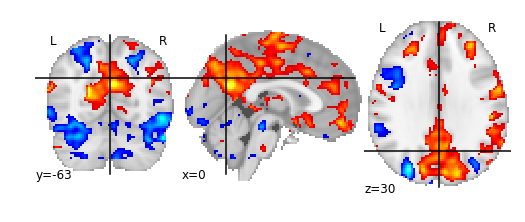

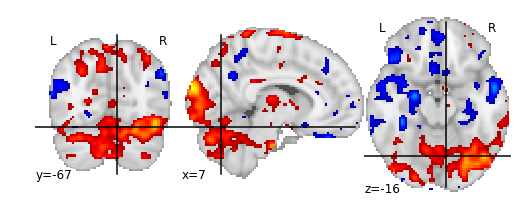

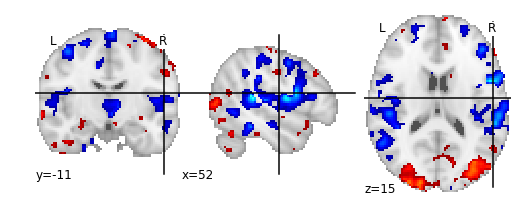

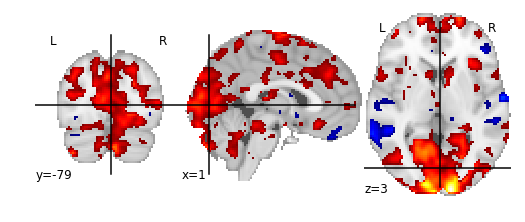

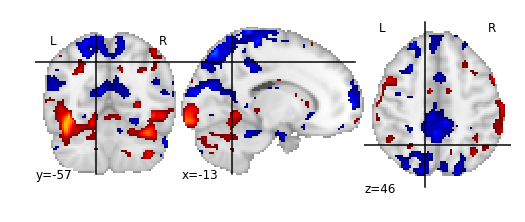

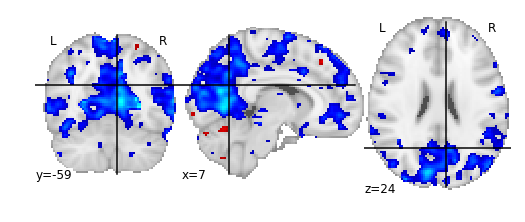

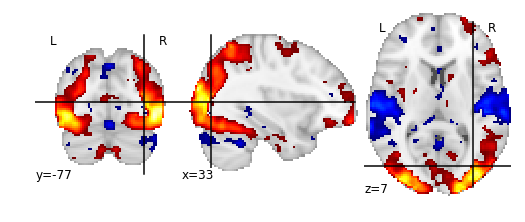

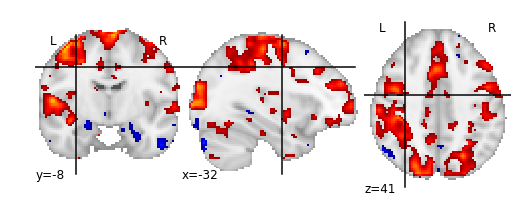

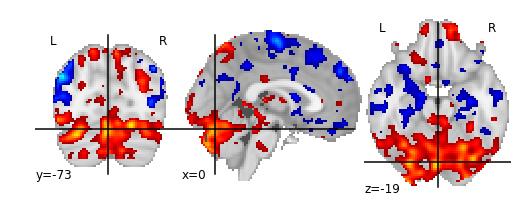

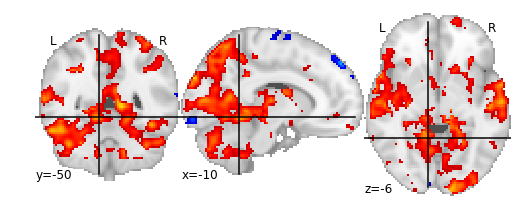

In [9]:
%matplotlib inline

with warnings.catch_warnings():
    warnings.simplefilter('ignore', DeprecationWarning)

    for index, grp_map in enumerate(grp_maps):
        if -grp_map.min() > grp_map.max():
            grp_map = - grp_map
            
        grp_threshold = stats.scoreatpercentile(np.abs(grp_map), 80)
        grp_img = masker.inverse_transform(grp_map)

        plotting.plot_stat_map(
            grp_img, threshold=grp_threshold, colorbar=False)